In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import snntorch as snn
from torch.utils.data import DataLoader

import sys
sys.path.append('../')
from toolbox import set_seed

np.set_printoptions(precision=2)
set_seed(1)

Random seed set as 1


### continous AND

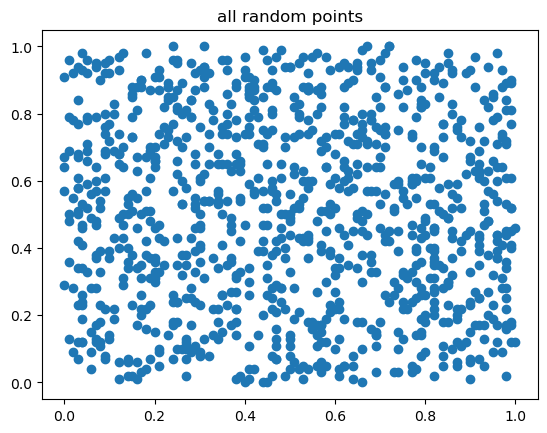

In [95]:
x = np.random.random(size=(1000, 2, 1)).round(2)
plt.scatter(x[:, 0], x[:, 1])
plt.title("all random points")
plt.show()

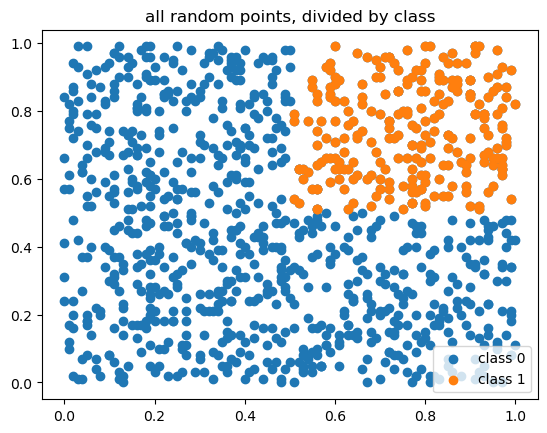

In [47]:
y = np.apply_along_axis(lambda t: t[0] > 0.5 and t[1] > 0.5, 1, x).astype(int)
mask = (y == 1).squeeze()

plt.title("all random points, divided by class")
plt.scatter(x[:, 0], x[:, 1], label="class 0")
plt.scatter(x[mask, 0], x[mask, 1], label="class 1")
plt.legend()
plt.show()

In [ ]:
def and_generator(size: int):
  x = Tensor(np.random.choice([0, 1], (size, 2)))
  y = Tensor([1 if i[0] and i[1] else 0 for i in x]).reshape(size, 1)

  return list(zip(x, y))

In [88]:
def continous_and_generator(size: int):
    x = torch.from_numpy(np.random.random(size=(size, 2, 1)).round(2))
    y = torch.from_numpy(np.apply_along_axis(lambda t: t[0] > 0.5 and t[1] > 0.5, 1, x).astype(int))
    return x, y


```torch.from_numpy``` doesnt copy the data, ```torch.Tensor``` does

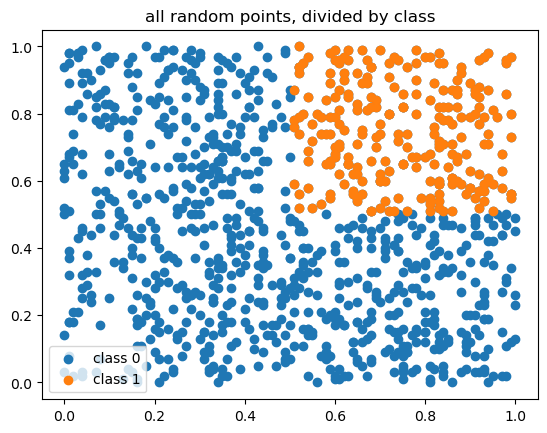

In [91]:
x, y = continous_and_generator(1000)
plt.title("all random points, divided by class")
plt.scatter(x[:, 0], x[:, 1], label="class 0")
plt.scatter(x[y==1, 0], x[y==1, 1], label="class 1")
plt.legend()
plt.show()

In [92]:
def continous_and_generator(size: int):
    x = torch.from_numpy(np.random.random(size=(size, 2, 1)).round(2))
    y = torch.from_numpy(np.apply_along_axis(lambda t: t[0] > 0.5 and t[1] > 0.5, 1, x).astype(int))
    return list(zip(x, y))

In [93]:
data = continous_and_generator(1000)
dataloader = DataLoader(data, batch_size=32)


In [94]:
x, y = next(iter(dataloader))
print(x.shape, y.shape)
print("x:", x[0], "\ny:", y[0])

torch.Size([32, 2, 1]) torch.Size([32, 1])
x: tensor([[0.2800],
        [0.0500]], dtype=torch.float64) 
y: tensor([0])


### continous OR

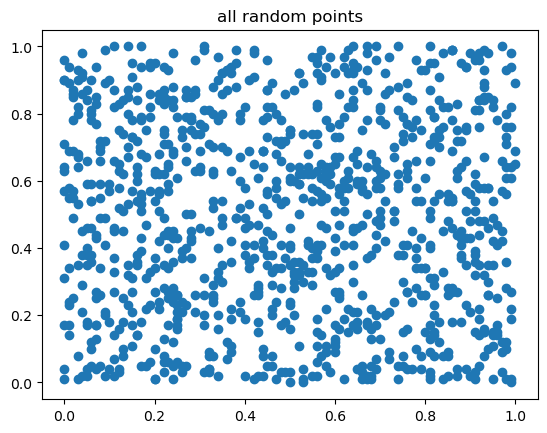

In [96]:
x = np.random.random(size=(1000, 2, 1)).round(2)
plt.scatter(x[:, 0], x[:, 1])
plt.title("all random points")
plt.show()

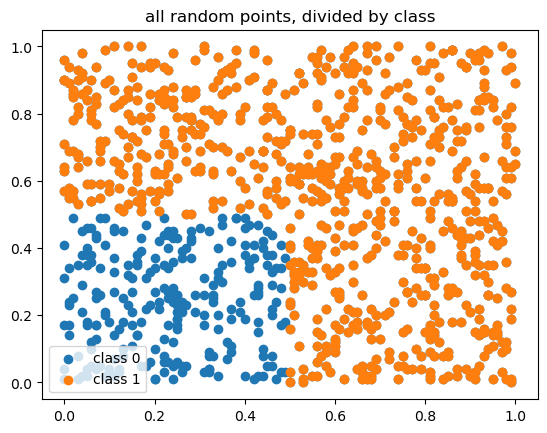

In [98]:
y = (~np.apply_along_axis(lambda t: t[0] < 0.5 and t[1] < 0.5, 1, x)).astype(int)
mask = (y == 1).squeeze()

plt.title("all random points, divided by class")
plt.scatter(x[:, 0], x[:, 1], label="class 0")
plt.scatter(x[mask, 0], x[mask, 1], label="class 1")
plt.legend()
plt.show()

In [99]:
def continous_or_generator(size: int):
    x = torch.from_numpy(np.random.random(size=(size, 2, 1)).round(2))
    y = torch.from_numpy((~np.apply_along_axis(lambda t: t[0] < 0.5 and t[1] < 0.5, 1, x)).astype(int))
    return list(zip(x, y))

In [100]:
x, y = next(iter(dataloader))
print(x.shape, y.shape)
print("x:", x[0], "\ny:", y[0])

torch.Size([32, 2, 1]) torch.Size([32, 1])
x: tensor([[0.2800],
        [0.0500]], dtype=torch.float64) 
y: tensor([0])


## continous XOR

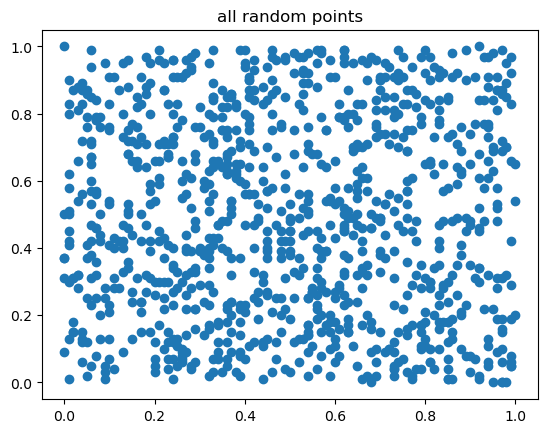

In [101]:
x = np.random.random(size=(1000, 2, 1)).round(2)
plt.scatter(x[:, 0], x[:, 1])
plt.title("all random points")
plt.show()

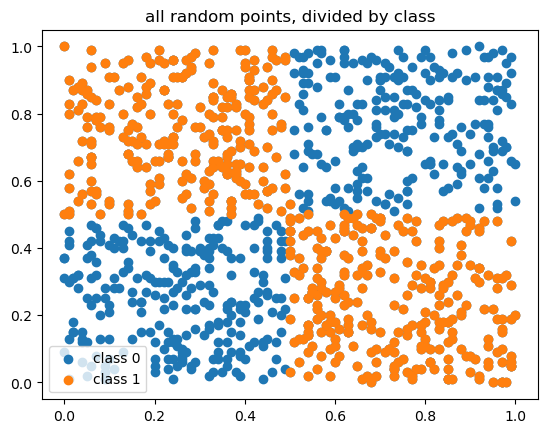

In [102]:
y = (~np.apply_along_axis(lambda t: (t[0] < 0.5 and t[1] < 0.5) or t[0] > 0.5 and t[1] > 0.5, 1, x)).astype(int)
mask = (y == 1).squeeze()

plt.title("all random points, divided by class")
plt.scatter(x[:, 0], x[:, 1], label="class 0")
plt.scatter(x[mask, 0], x[mask, 1], label="class 1")
plt.legend()
plt.show()

In [105]:
def continous_xor_generator(size: int):
    x = torch.from_numpy(np.random.random(size=(size, 2, 1)).round(2))
    y = torch.from_numpy((~np.apply_along_axis(lambda t: (t[0] < 0.5 and t[1] < 0.5) or t[0] > 0.5 and t[1] > 0.5, 1, x)).astype(int))
    return list(zip(x, y))

In [106]:
x, y = next(iter(dataloader))
print(x.shape, y.shape)
print("x:", x[0], "\ny:", y[0])

torch.Size([32, 2, 1]) torch.Size([32, 1])
x: tensor([[0.2800],
        [0.0500]], dtype=torch.float64) 
y: tensor([0])
